# Table of Contents   

### 1. Importing Visualization Libraries and Data  
### 2. Data Cleaning  
### 3. Exploring Relationships  
>> **3.a Correlations**  
>> **3.b Scatterplots**  
>> **3.c Pair Plots**   
>> **3.d Categorical Plots**  

### 4. Export the Cleaned Dataframe

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create a Path variable
path=r'C:\Users\sands\Documents\03-2023 Airbnb New York'

# Read the Airbnb Listings CSV file
df_list = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','Airbnb_cleaned.csv'))

## 2. Data Cleaning

In [4]:
df_list.shape

(41533, 18)

In [5]:
df_list.columns

Index(['Unnamed: 0', 'Id', 'Listing Name', 'Host Id', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Latitude', 'Longitude',
       'Listing Type', 'Price', 'Minimum Nights', 'Total Reviews',
       'Last Review Date', 'Reviews per Month', 'Host Listings Count',
       'Future Availability', 'Reviews in Last 12 Months'],
      dtype='object')

In [6]:
df_list.dtypes

Unnamed: 0                     int64
Id                             int64
Listing Name                  object
Host Id                        int64
Host Name                     object
Neighbourhood Group           object
Neighbourhood                 object
Latitude                     float64
Longitude                    float64
Listing Type                  object
Price                          int64
Minimum Nights                 int64
Total Reviews                  int64
Last Review Date              object
Reviews per Month            float64
Host Listings Count            int64
Future Availability            int64
Reviews in Last 12 Months      int64
dtype: object

In [7]:
df_list.head()

,Unnamed: 0,Id,Listing Name,Host Id,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Listing Type,Price,Minimum Nights,Total Reviews,Last Review Date,Reviews per Month,Host Listings Count,Future Availability,Reviews in Last 12 Months
0,0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1
1,1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0
2,2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0
3,3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,2022-11-20,3.38,1,79,50
4,4,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1


In [8]:
# Check for missing values

df_list.isnull().sum()

Unnamed: 0                      0
Id                              0
Listing Name                   13
Host Id                         0
Host Name                       5
Neighbourhood Group             0
Neighbourhood                   0
Latitude                        0
Longitude                       0
Listing Type                    0
Price                           0
Minimum Nights                  0
Total Reviews                   0
Last Review Date             9393
Reviews per Month            9393
Host Listings Count             0
Future Availability             0
Reviews in Last 12 Months       0
dtype: int64

In [9]:
# Replace the Nan values in Reviews per Month with 0

df_list.fillna({'Reviews per Month':0}, inplace=True)

In [10]:
# Check for missing values again

df_list.isnull().sum()

Unnamed: 0                      0
Id                              0
Listing Name                   13
Host Id                         0
Host Name                       5
Neighbourhood Group             0
Neighbourhood                   0
Latitude                        0
Longitude                       0
Listing Type                    0
Price                           0
Minimum Nights                  0
Total Reviews                   0
Last Review Date             9393
Reviews per Month               0
Host Listings Count             0
Future Availability             0
Reviews in Last 12 Months       0
dtype: int64

**The missing values in Listing Name do not affect the analysis in any way so they don't need any treatment. The Last Review Date is empty because these are new listings and have not been reviewed yet. They can be left as is too.**

In [11]:
# Find duplicates

df_dups = df_list[df_list.duplicated()]

In [12]:
df_dups 

,Unnamed: 0,Id,Listing Name,Host Id,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Listing Type,Price,Minimum Nights,Total Reviews,Last Review Date,Reviews per Month,Host Listings Count,Future Availability,Reviews in Last 12 Months


In [13]:
# Find Mixed Datatype Columns

for col in df_list.columns.tolist():
      weird = (df_list[[col]].applymap(type) != df_list[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_list[weird]) > 0:
        print (col)

Listing Name
Host Name
Last Review Date


In [14]:
# Change the Datatype to be consistent and drop the 'Unnamed: 0' column as it's of no use and 'Host Name' to compy with Data Ethics policies

df_list =df_list.astype({'Listing Name':'string',
                         'Host Name':'string',
                          'Last Review Date':'datetime64[ns]'}).drop(columns=['Unnamed: 0','Host Name'])  

In [15]:
# Check the shape of the new dataframe

df_list.shape

(41533, 16)

## 3. Exploring Relationships

In [16]:
# Check the unique values of the Neighbourhood Group Column

df_list['Neighbourhood Group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [17]:
# Check the count of unique values of the Neighbourhood Column, it might be useful in the later analysis

len(df_list['Neighbourhood'].unique())

223

In [18]:
# Check the unique values of the Neighbourhood Group Column

df_list['Listing Type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

**These findings can be used in the analysis later to draw visulaizations and identify trends**

### 3.a Correlation

In [19]:
# Create a correlation matrix using pandas

df_list.corr()

,Id,Host Id,Latitude,Longitude,Price,Minimum Nights,Total Reviews,Reviews per Month,Host Listings Count,Future Availability,Reviews in Last 12 Months
Id,1.000000,0.367908,0.004049,0.085652,0.052341,-0.142932,-0.211324,0.133042,0.076095,0.323423,-0.069172
Host Id,0.367908,1.000000,0.023445,0.156052,0.037734,-0.156608,-0.090091,0.218787,-0.022939,0.272950,0.126035
Latitude,0.004049,0.023445,1.000000,0.046945,0.011415,0.031233,-0.041686,-0.049148,0.039864,-0.016416,-0.042152
Longitude,0.085652,0.156052,0.046945,1.000000,-0.064395,-0.088284,0.046290,0.114719,-0.081632,0.127564,0.072326
Price,0.052341,0.037734,0.011415,-0.064395,1.000000,-0.028814,-0.014933,-0.009764,0.019750,0.037110,-0.007198
Minimum Nights,-0.142932,-0.156608,0.031233,-0.088284,-0.028814,1.000000,-0.135415,-0.233340,0.136722,-0.093994,-0.206901
Total Reviews,-0.211324,-0.090091,-0.041686,0.046290,-0.014933,-0.135415,1.000000,0.567604,-0.100448,0.082328,0.653603
Reviews per Month,0.133042,0.218787,-0.049148,0.114719,-0.009764,-0.233340,0.567604,1.000000,-0.098692,0.193292,0.839614
Host Listings Count,0.076095,-0.022939,0.039864,-0.081632,0.019750,0.136722,-0.100448,-0.098692,1.000000,0.152328,-0.069624
Future Availability,0.323423,0.272950,-0.016416,0.127564,0.037110,-0.093994,0.082328,0.193292,0.152328,1.000000,0.157874


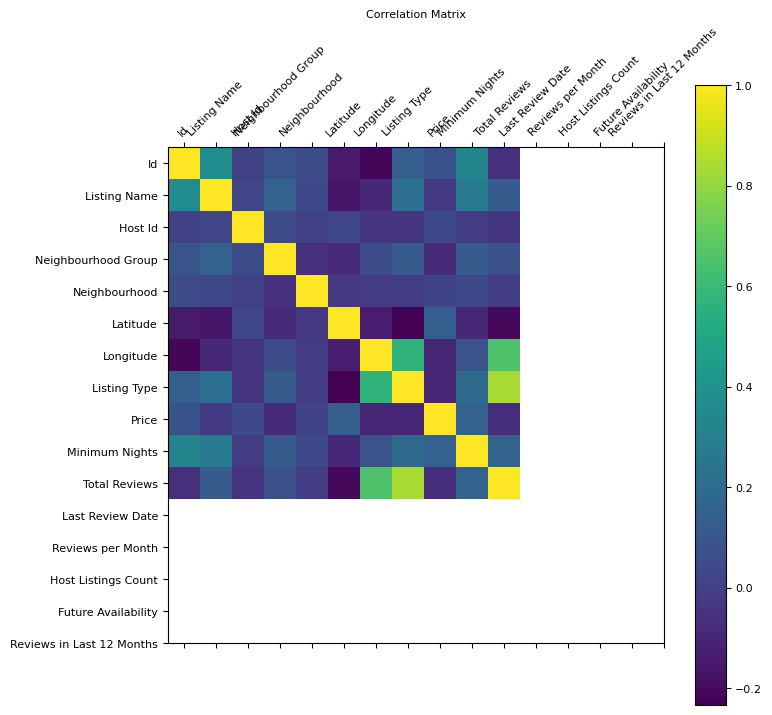

In [20]:
# Create a correlation heatmap using matplotlib

f = plt.figure(figsize=(8, 8)) # figure size 

plt.matshow(df_list.corr(), fignum=f.number) # type of plot


plt.xticks(range(df_list.shape[1]), df_list.columns, fontsize=8, rotation=45) # x axis labels

plt.yticks(range(df_list.shape[1]), df_list.columns, fontsize=8) # y axis labels

cb = plt.colorbar() # add a colour legend (called colorbar)

cb.ax.tick_params(labelsize=8) # add font size

plt.title('Correlation Matrix', fontsize=8) # add title

# Save figure
plt.savefig("out.png")

### Create a correlation heatmap using seaborn:

In [21]:
df_list.columns

Index(['Id', 'Listing Name', 'Host Id', 'Neighbourhood Group', 'Neighbourhood',
       'Latitude', 'Longitude', 'Listing Type', 'Price', 'Minimum Nights',
       'Total Reviews', 'Last Review Date', 'Reviews per Month',
       'Host Listings Count', 'Future Availability',
       'Reviews in Last 12 Months'],
      dtype='object')

In [23]:
# Create a subset excluding the "Date" and "Id" columns

sub = df_list[['Listing Name', 'Neighbourhood Group',
               'Neighbourhood', 'Latitude', 'Longitude', 'Listing Type', 'Price',
               'Minimum Nights', 'Total Reviews','Host Listings Count', 
               'Future Availability']]

In [24]:
sub

,Listing Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Listing Type,Price,Minimum Nights,Total Reviews,Host Listings Count,Future Availability
0,"Spacious Brooklyn Duplex, Patio + Garden",Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,21,3,1,267
1,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,1,0
2,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2,322
3,Large Furnished Room Near B'way,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,559,1,79
4,Skylit Midtown Castle,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,175,30,49,3,365
...,...,...,...,...,...,...,...,...,...,...,...
41528,Romántico y natural,Manhattan,Washington Heights,40.847271,-73.943419,Private room,80,5,0,3,358
41529,Sunset Park Studio Sublet,Brooklyn,Sunset Park,40.638329,-74.016710,Entire home/apt,42,30,0,3,89
41530,9B5B Townhouse w/ Elevator & Private Entrance,Manhattan,Murray Hill,40.746902,-73.978260,Entire home/apt,3888,2,0,8,365
41531,Huge 9B5B Townhouse w Elevator & Private Entr...,Manhattan,Murray Hill,40.749596,-73.980798,Entire home/apt,3888,2,0,2,364


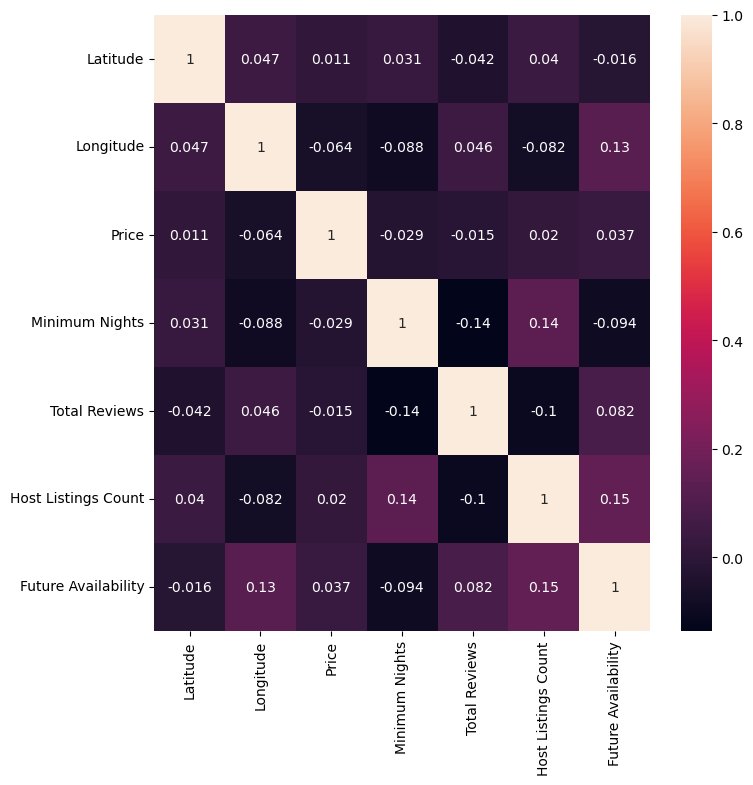

In [25]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

**It doesn't appear that any of the variables have a linear correlation**

### 3.b Scatterplots

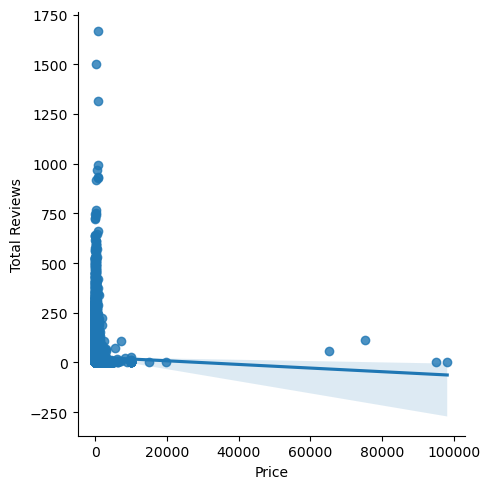

In [26]:
# Create a scatterplot for the "total reviews" and "price" columns in seaborn

sns.lmplot(x = 'Price', y = 'Total Reviews', data = df_list)

**The Price is independent of the Total Reviews and does not show a positive or negative correlation**

### 3.c Pair Plots

In [27]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Price', 'Total Reviews', 'Future Availability']]

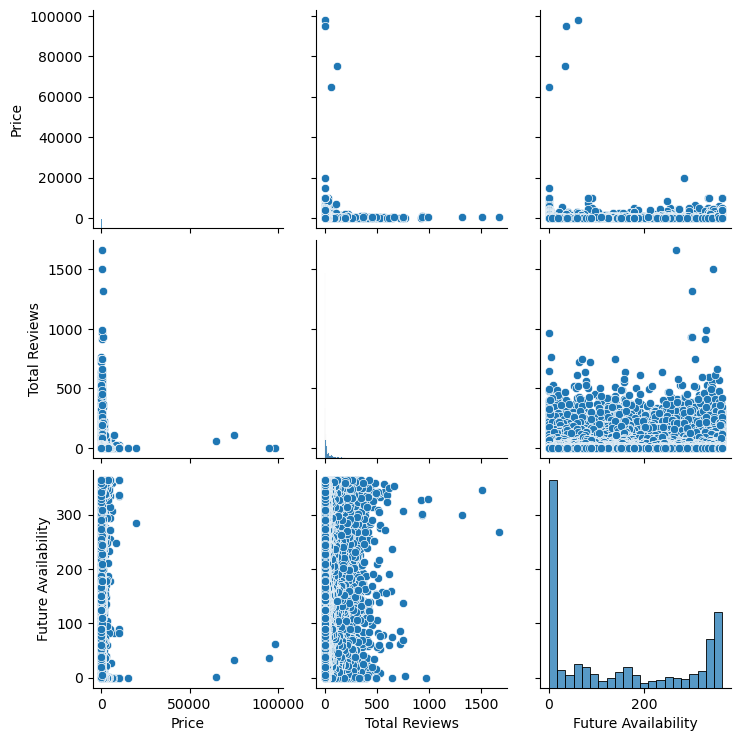

In [28]:
# Create a pair plot 

g = sns.pairplot(sub_2)

In [29]:
# Keep only the variables you want to use in the pair plot

sub_3 = sub[['Price', 'Minimum Nights','Host Listings Count','Total Reviews']]

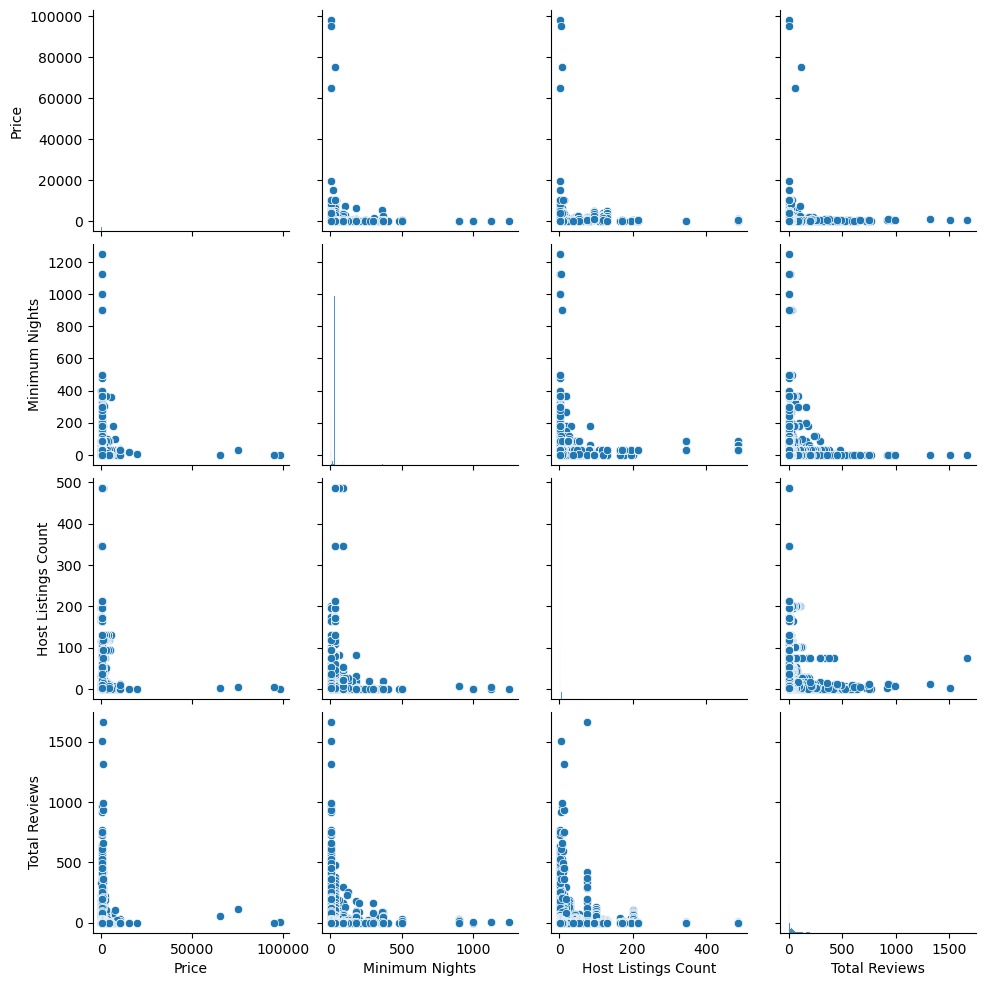

In [30]:
# Create a pair plot 

h = sns.pairplot(sub_3)

### 3.d Categorical Plots

<AxesSubplot:xlabel='Price', ylabel='Count'>

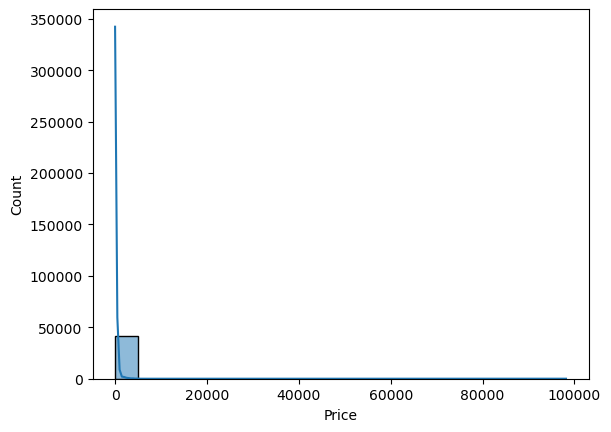

In [31]:
sns.histplot(df_list['Price'], bins = 20, kde = True)

In [32]:
# Define the function
def create_price_groups(df_list):
    df_list['price_group'] = pd.cut(x=df_list['Price'], bins=[0,1000,3000,98170], 
                             labels=['Low Price','Medium Price','High Price'])
    return df_list

# Call function
df_list = create_price_groups(df_list)

In [33]:
df_list

,Id,Listing Name,Host Id,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Listing Type,Price,Minimum Nights,Total Reviews,Last Review Date,Reviews per Month,Host Listings Count,Future Availability,Reviews in Last 12 Months,price_group
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,Low Price
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.803800,-73.967510,Private room,75,2,118,2017-07-21,0.73,1,0,0,Low Price
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2019-12-02,0.30,2,322,0,Low Price
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,559,2022-11-20,3.38,1,79,50,Low Price
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,175,30,49,2022-06-21,0.31,3,365,1,Low Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,771962449581256963,Romántico y natural,421601513,Manhattan,Washington Heights,40.847271,-73.943419,Private room,80,5,0,NaT,0.00,3,358,0,Low Price
41529,771967712456918474,Sunset Park Studio Sublet,326495,Brooklyn,Sunset Park,40.638329,-74.016710,Entire home/apt,42,30,0,NaT,0.00,3,89,0,Low Price
41530,771971759808918693,9B5B Townhouse w/ Elevator & Private Entrance,316920152,Manhattan,Murray Hill,40.746902,-73.978260,Entire home/apt,3888,2,0,NaT,0.00,8,365,0,High Price
41531,771971822371481471,Huge 9B5B Townhouse w Elevator & Private Entr...,484979380,Manhattan,Murray Hill,40.749596,-73.980798,Entire home/apt,3888,2,0,NaT,0.00,2,364,0,High Price


In [34]:
df_list['price_group'].value_counts(dropna = False)

Low Price       40723
Medium Price      644
High Price        136
NaN                30
Name: price_group, dtype: int64

In [35]:
df_list.columns

Index(['Id', 'Listing Name', 'Host Id', 'Neighbourhood Group', 'Neighbourhood',
       'Latitude', 'Longitude', 'Listing Type', 'Price', 'Minimum Nights',
       'Total Reviews', 'Last Review Date', 'Reviews per Month',
       'Host Listings Count', 'Future Availability',
       'Reviews in Last 12 Months', 'price_group'],
      dtype='object')

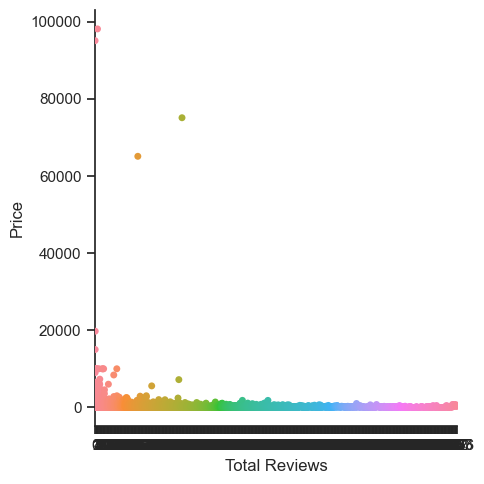

In [38]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style='ticks')
g = sns.catplot(x='Total Reviews', y='Price', data=df_list)

### Question 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

**Answer**  I would like to answer the following questions with the analysis:

•	What can be learnt about different hosts and areas?

•	What can be learnt from location, review, and price predictions?

**•	Is there a correlation between busiest hosts and other variables like reviews, availability, price and location? - It appears that there is no linear observable correlation**

•	Is there any noticeable difference of traffic among different areas and what could be the reason for it?

### Question 8. Define any hypotheses that you can at this point. You’ll be testing these later on.
**Answer** I would like to test the following hypothesis:
The Price of an airbnb offering depends on the location.

### 4. Export the Cleaned Dataframe

In [37]:
# Export the cleaned dataset to a csv file
df_list.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Airbnb_0306.csv'))